In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [96]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
      s = sigmoid(x)
      return s * (1 - s)

In [97]:
def initialize_dataset():
  X = np.array([
            [0, 0],
            [0, 1],
            [1, 0],
            [1, 1]
                                        ])
  y = np.array([[0], [1], [1], [0]])
  return X, y
X, y = initialize_dataset()
print("X:\n", X)
print("y:\n", y)

X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y:
 [[0]
 [1]
 [1]
 [0]]


In [98]:
def initialize_parameters(n_input, n_hidden, n_output):
              W1 = np.random.randn(n_input, n_hidden) * 0.01
              b1 = np.zeros((1, n_hidden))
              W2 = np.random.randn(n_hidden, n_output) * 0.01
              b2 = np.zeros((1, n_output))

              parameters = {
                               "W1": W1,
                               "b1": b1,
                               "W2": W2,
                               "b2": b2
                                                                              }

              return parameters

In [99]:
def forward_propagation(X, parameters):

          W1 = parameters["W1"]
          b1 = parameters["b1"]
          W2 = parameters["W2"]
          b2 = parameters["b2"]
          z1 = np.dot(X, W1) + b1

          a1 = sigmoid(z1)
          z2 = np.dot(a1, W2) + b2
          y_hat = sigmoid(z2)

          cache = {
              "z1": z1,
              "a1": a1,
              "z2": z2,
              "y_hat": y_hat
          }

          return y_hat, cache

In [100]:
def compute_loss(y, y_hat):
      n = y.shape[0]  
      loss = (1/n) * np.sum((y - y_hat) ** 2)
      return loss

In [101]:
def backpropagation(X, y, parameters, cache):

          W1 = parameters["W1"]
          W2 = parameters["W2"]

          z1 = cache["z1"]
          a1 = cache["a1"]
          z2 = cache["z2"]
          y_hat = cache["y_hat"]

          n = X.shape[0]
          dL_dyhat = -(2/n) * (y - y_hat)
          dyhat_dz2 = sigmoid_derivative(z2)
          dz2 = dL_dyhat * dyhat_dz2

          dW2 = np.dot(a1.T, dz2)
          db2 = np.sum(dz2, axis=0, keepdims=True)
          dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
          dW1 = np.dot(X.T, dz1)
          db1 = np.sum(dz1, axis=0, keepdims=True)

          gradients = {
                       "dW1": dW1,
                       "db1": db1,
                       "dW2": dW2,
                       "db2": db2}
          return gradients

In [102]:
def update_parameters(parameters, gradients, learning_rate):
              parameters["W2"] = parameters["W2"] - learning_rate * gradients["dW2"]
              parameters["b2"] = parameters["b2"] - learning_rate * gradients["db2"]
              parameters["W1"] = parameters["W1"] - learning_rate * gradients["dW1"]
              parameters["b1"] = parameters["b1"] - learning_rate * gradients["db1"]

              return parameters


In [103]:
def train(X, y, n_input, n_hidden, n_output, epochs=1000, learning_rate=0.01):
              parameters = initialize_parameters(n_input, n_hidden, n_output)

              losses = []

              for epoch in range(epochs):
                      y_hat, cache = forward_propagation(X, parameters)
                      loss = compute_loss(y, y_hat)
                      losses.append(loss)
                      gradients = backpropagation(X, y, parameters, cache)
                      parameters = update_parameters(parameters, gradients, learning_rate)
                      if epoch % 100 == 0:
                               print(f"Epoch {epoch}, Loss: {loss:.4f}")

                               return parameters, losses


In [104]:

def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")
    plt.show()

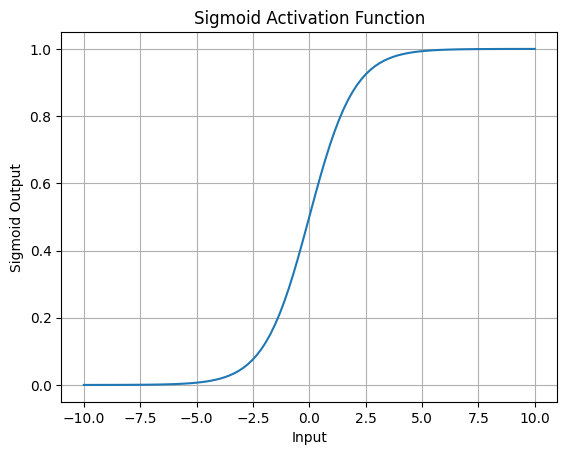

In [105]:
def plot_activation():
      x = np.linspace(-10, 10, 100)
      y = 1 / (1 + np.exp(-x)) 
      plt.plot(x, y)
      plt.xlabel("Input")
      plt.ylabel("Sigmoid Output")
      plt.title("Sigmoid Activation Function")
      plt.grid(True)
      plt.show()
plot_activation()

In [106]:
def predict(X_test, parameters):
              y_hat, _ = forward_propagation(X_test, parameters)

              return y_hat


In [107]:
def predict_class(X_test, parameters, threshold=0.5):

          y_hat, _ = forward_propagation(X_test, parameters)

          predictions = (y_hat > threshold).astype(int)

          return predictions


In [108]:
X_test = np.array([[1, 0]])

n_input = X.shape[1]
n_hidden = 4
n_output = y.shape[1]

params, _ = train(X, y, n_input, n_hidden, n_output,
                  epochs=10000, learning_rate=0.1)

prob = predict(X_test, params)
print("Predicted Probability:", prob)

pred = predict_class(X_test, params)
print("Predicted Class:", pred)


Epoch 0, Loss: 0.2500
Predicted Probability: [[0.50156231]]
Predicted Class: [[1]]
